## **This *'ipynb'* file shows the data visualizations of US Presidential Elections in 2020 by County.**

In [1]:
# connecting to Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/US Elections 2020 county

Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/MyDrive/US Elections 2020 county'
/content


In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/US Elections 2020 county /2020_US_County_Level_Presidential_Results.csv")

In [4]:
# Fill empty spaces (NaN values) in the columns with 0
data.fillna(0, inplace=True)

# Save the updated CSV file
output_path = '/content/drive/MyDrive/US Elections 2020 county /2020_US_County_Level_Presidential_Results_filled.csv'
data.to_csv(output_path, index=False)

print(f"File with filled spaces saved to: {output_path}")

File with filled spaces saved to: /content/drive/MyDrive/US Elections 2020 county /2020_US_County_Level_Presidential_Results_filled.csv


In [5]:
# load the new dataset
data = pd.read_csv("/content/drive/MyDrive/US Elections 2020 county /2020_US_County_Level_Presidential_Results_filled.csv")

In [6]:
data.head()

,year,county_fips,county_name,state,totalvotes,DEMOCRAT,GREEN,LIBERTARIAN,OTHER,REPUBLICAN
0,2020,1001.0,AUTAUGA,ALABAMA,27770,7503,0.0,0.0,429.0,19838
1,2020,1003.0,BALDWIN,ALABAMA,109679,24578,0.0,0.0,1557.0,83544
2,2020,1005.0,BARBOUR,ALABAMA,10518,4816,0.0,0.0,80.0,5622
3,2020,1007.0,BIBB,ALABAMA,9595,1986,0.0,0.0,84.0,7525
4,2020,1009.0,BLOUNT,ALABAMA,27588,2640,0.0,0.0,237.0,24711


In [7]:
party_vote_columns = ['DEMOCRAT', 'REPUBLICAN', 'GREEN', 'LIBERTARIAN', 'OTHER']
total_votes_by_party = data[party_vote_columns].sum()

# percentage of votes for each party
total_votes = total_votes_by_party.sum()
percentage_by_party = (total_votes_by_party / total_votes) * 100

# Combine the total votes and percentages
results = pd.DataFrame({
    'Total Votes': total_votes_by_party,
    'Percentage (%)': percentage_by_party
})

print("Total Votes and Percentage by Each Party:")
print(results)

Total Votes and Percentage by Each Party:
             Total Votes  Percentage (%)
DEMOCRAT      75955993.0       51.327172
REPUBLICAN    69253025.0       46.797649
GREEN           359519.0        0.242945
LIBERTARIAN    1663258.0        1.123945
OTHER           752187.0        0.508289


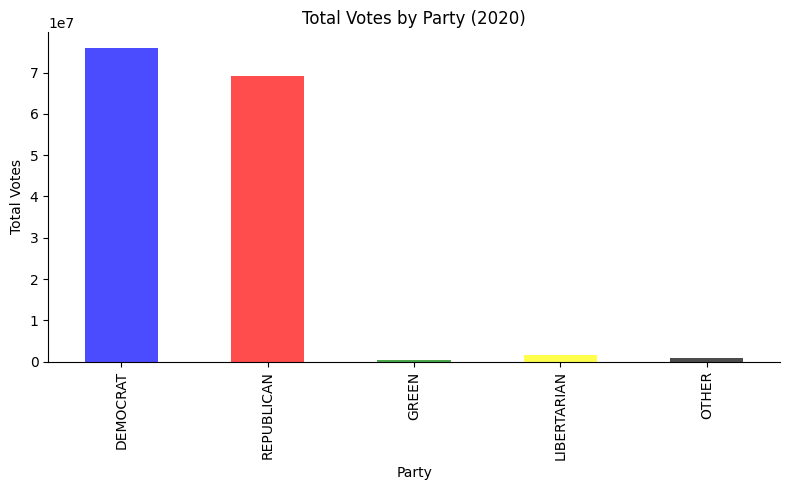

In [48]:
# bar chart showing total votes for each party
plt.figure(figsize=(8, 5))
total_votes_by_party.plot(kind='bar', color=['blue', 'red', 'green', 'yellow', 'black'], alpha=0.7)

plt.title('Total Votes by Party (2020)')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

In [30]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

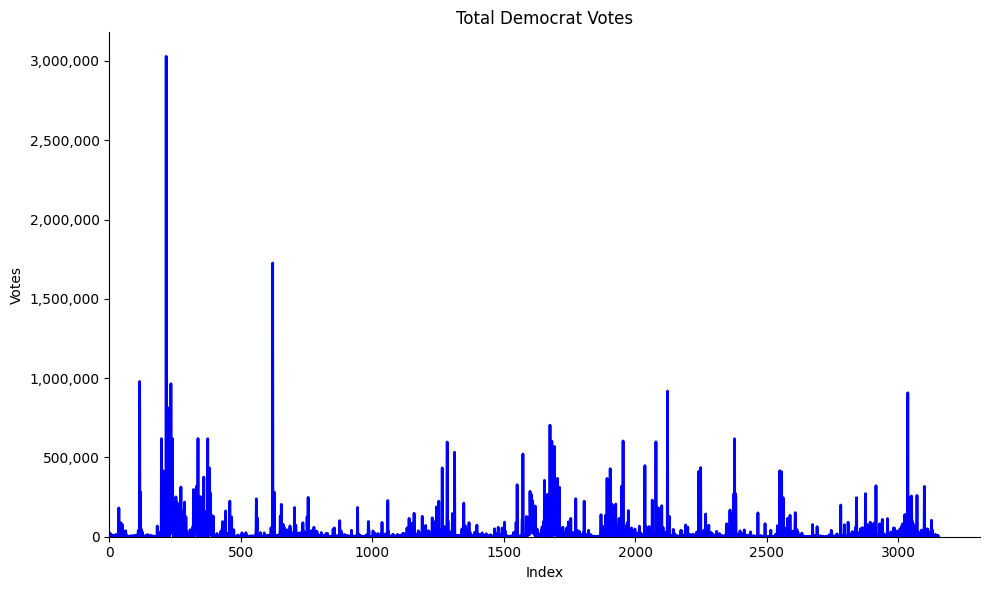

In [35]:
# bar graph showing democrat votes in each county
plt.figure(figsize=(10, 6))
plt.plot(data['DEMOCRAT'], color='blue', linewidth=2, label='Democrat Votes')
plt.title('Total Democrat Votes')
plt.xlabel('Index')
plt.ylabel('Votes')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlim(0)
plt.ylim(0)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.tight_layout()
plt.show()

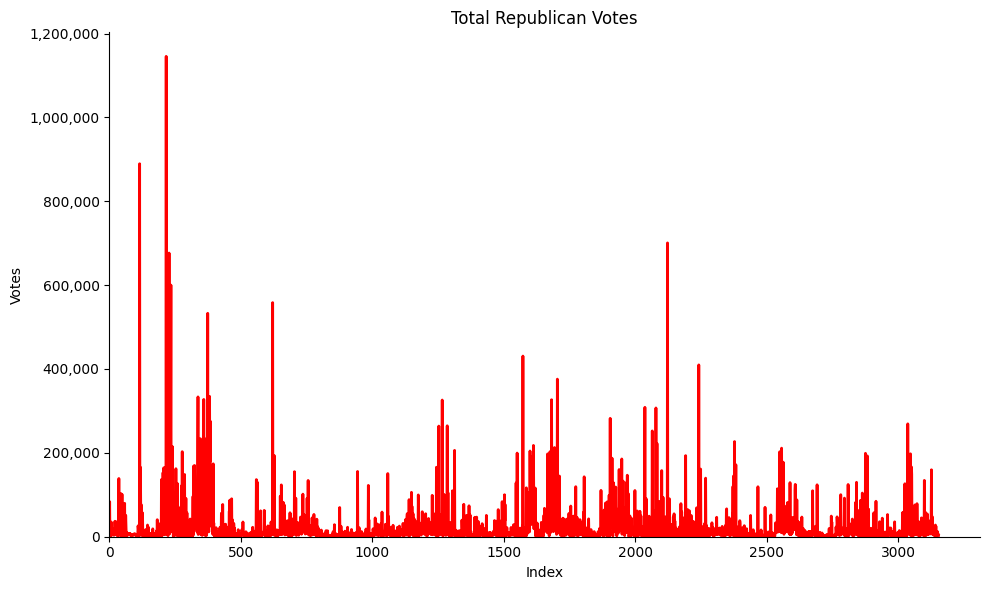

In [38]:
# bar graph showing republican votes in each county
plt.figure(figsize=(10, 6))
plt.plot(data['REPUBLICAN'], color='red', linewidth=2, label='Republican Votes')
plt.title('Total Republican Votes')
plt.xlabel('Index')
plt.ylabel('Votes')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlim(0)
plt.ylim(0)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.tight_layout()
plt.show()

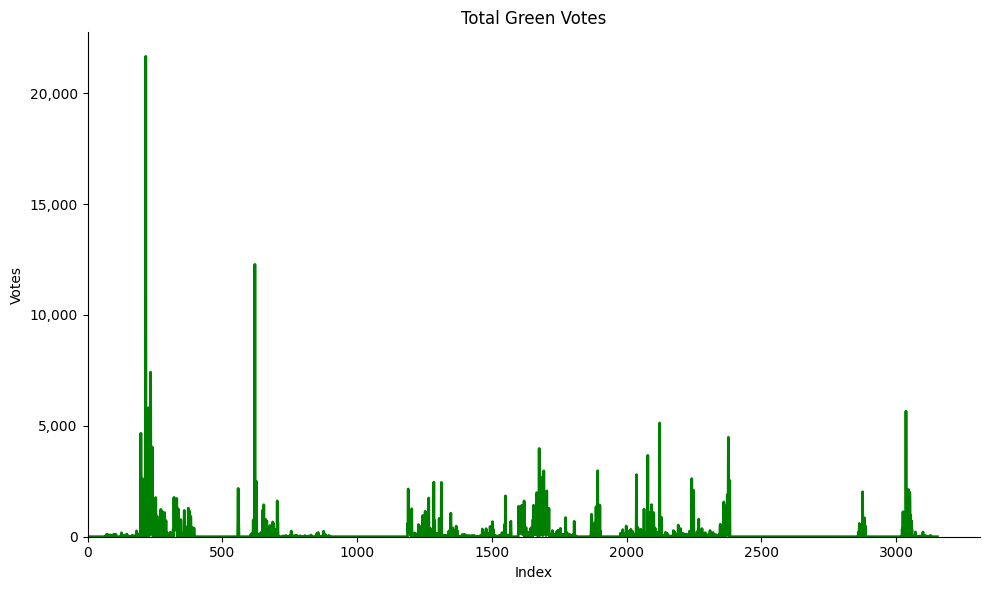

In [40]:
# bar graph showing green votes in each county
plt.figure(figsize=(10, 6))
plt.plot(data['GREEN'], color='green', linewidth=2, label='Green Votes')
plt.title('Total Green Votes')
plt.xlabel('Index')
plt.ylabel('Votes')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlim(0)
plt.ylim(0)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.tight_layout()
plt.show()

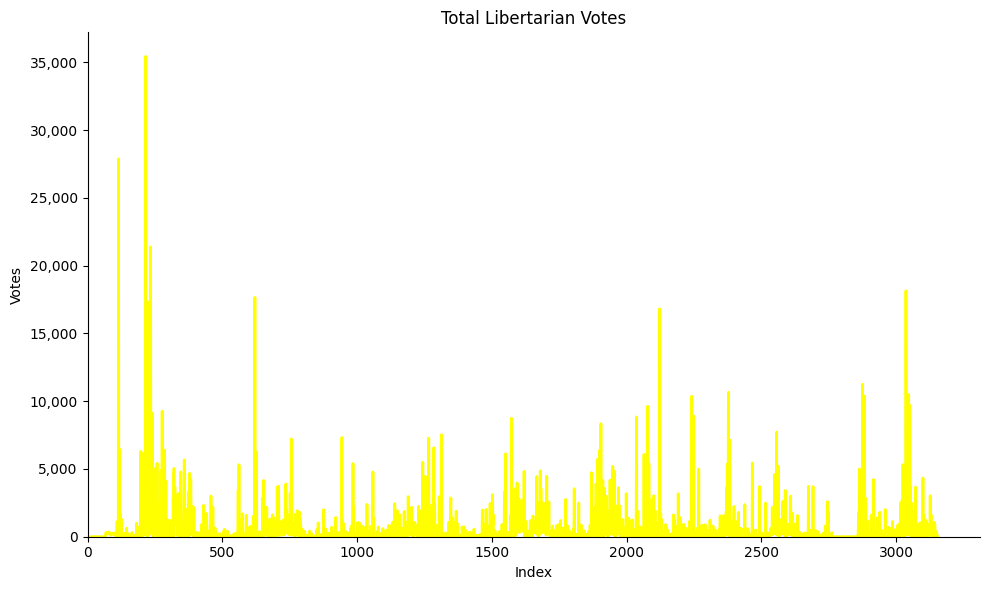

In [41]:
# bar graph showing Libertarian votes in each county
plt.figure(figsize=(10, 6))
plt.plot(data['LIBERTARIAN'], color='yellow', linewidth=2, label='Libertarian Votes')
plt.title('Total Libertarian Votes')
plt.xlabel('Index')
plt.ylabel('Votes')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlim(0)
plt.ylim(0)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.tight_layout()
plt.show()

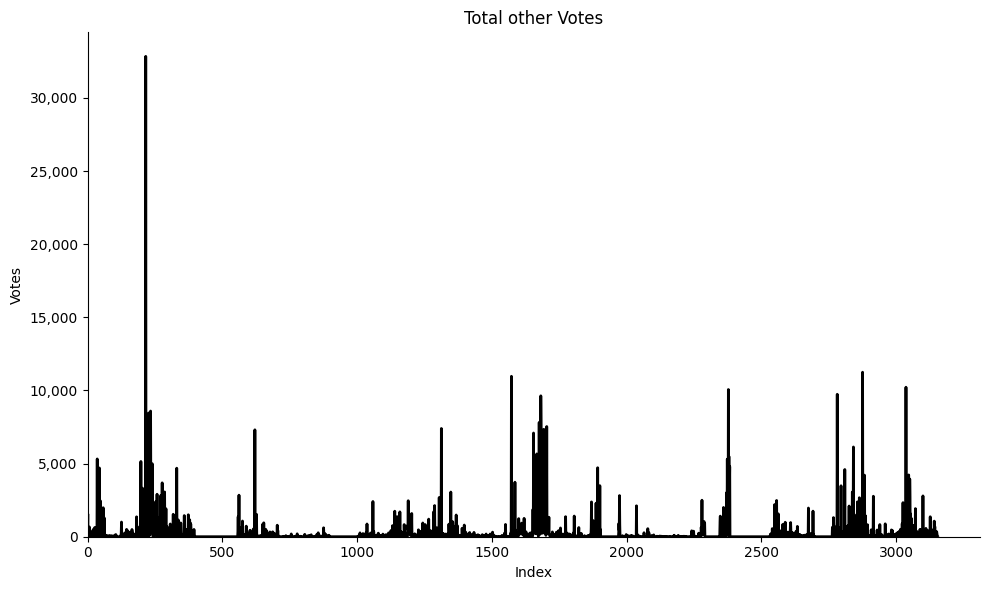

In [42]:
# bar graph showing other votes in each county
plt.figure(figsize=(10, 6))
plt.plot(data['OTHER'], color='black', linewidth=2, label='other Votes')
plt.title('Total other Votes')
plt.xlabel('Index')
plt.ylabel('Votes')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlim(0)
plt.ylim(0)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

plt.tight_layout()
plt.show()

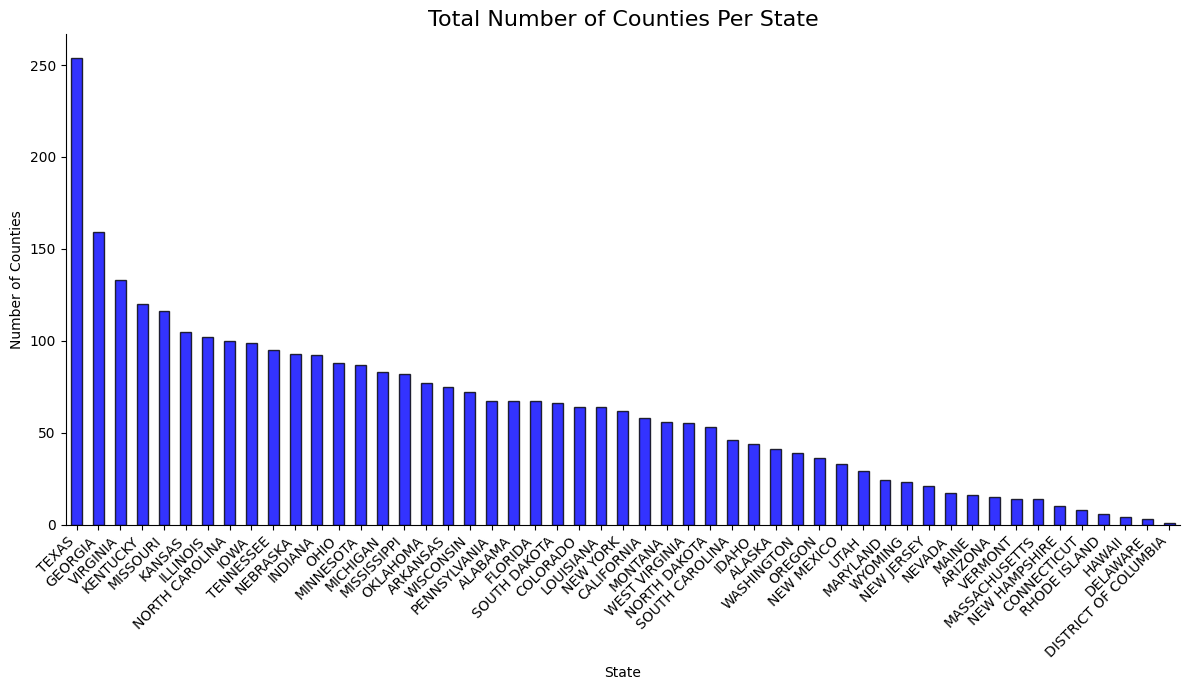

In [61]:
# Total Number of Counties in each State
counties_per_state = data.groupby('state')['county_name'].count()

counties_per_state = counties_per_state.sort_values(ascending=False)

plt.figure(figsize=(12, 7))
counties_per_state.plot(kind='bar', color='blue', edgecolor='black', alpha=0.8)

plt.title('Total Number of Counties Per State', fontsize=16)
plt.xlabel('State')
plt.ylabel('Number of Counties')
plt.xticks(rotation=45, ha='right')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()

In [45]:
print(counties_per_state)

# total number of counties
total_counties = counties_per_state.sum()

print(f"Total Number of Counties Across All States: {total_counties}")

state
TEXAS                   254
GEORGIA                 159
VIRGINIA                133
KENTUCKY                120
MISSOURI                116
KANSAS                  105
ILLINOIS                102
NORTH CAROLINA          100
IOWA                     99
TENNESSEE                95
NEBRASKA                 93
INDIANA                  92
OHIO                     88
MINNESOTA                87
MICHIGAN                 83
MISSISSIPPI              82
OKLAHOMA                 77
ARKANSAS                 75
WISCONSIN                72
PENNSYLVANIA             67
ALABAMA                  67
FLORIDA                  67
SOUTH DAKOTA             66
COLORADO                 64
LOUISIANA                64
NEW YORK                 62
CALIFORNIA               58
MONTANA                  56
WEST VIRGINIA            55
NORTH DAKOTA             53
SOUTH CAROLINA           46
IDAHO                    44
ALASKA                   41
WASHINGTON               39
OREGON                   36
NEW MEXICO    

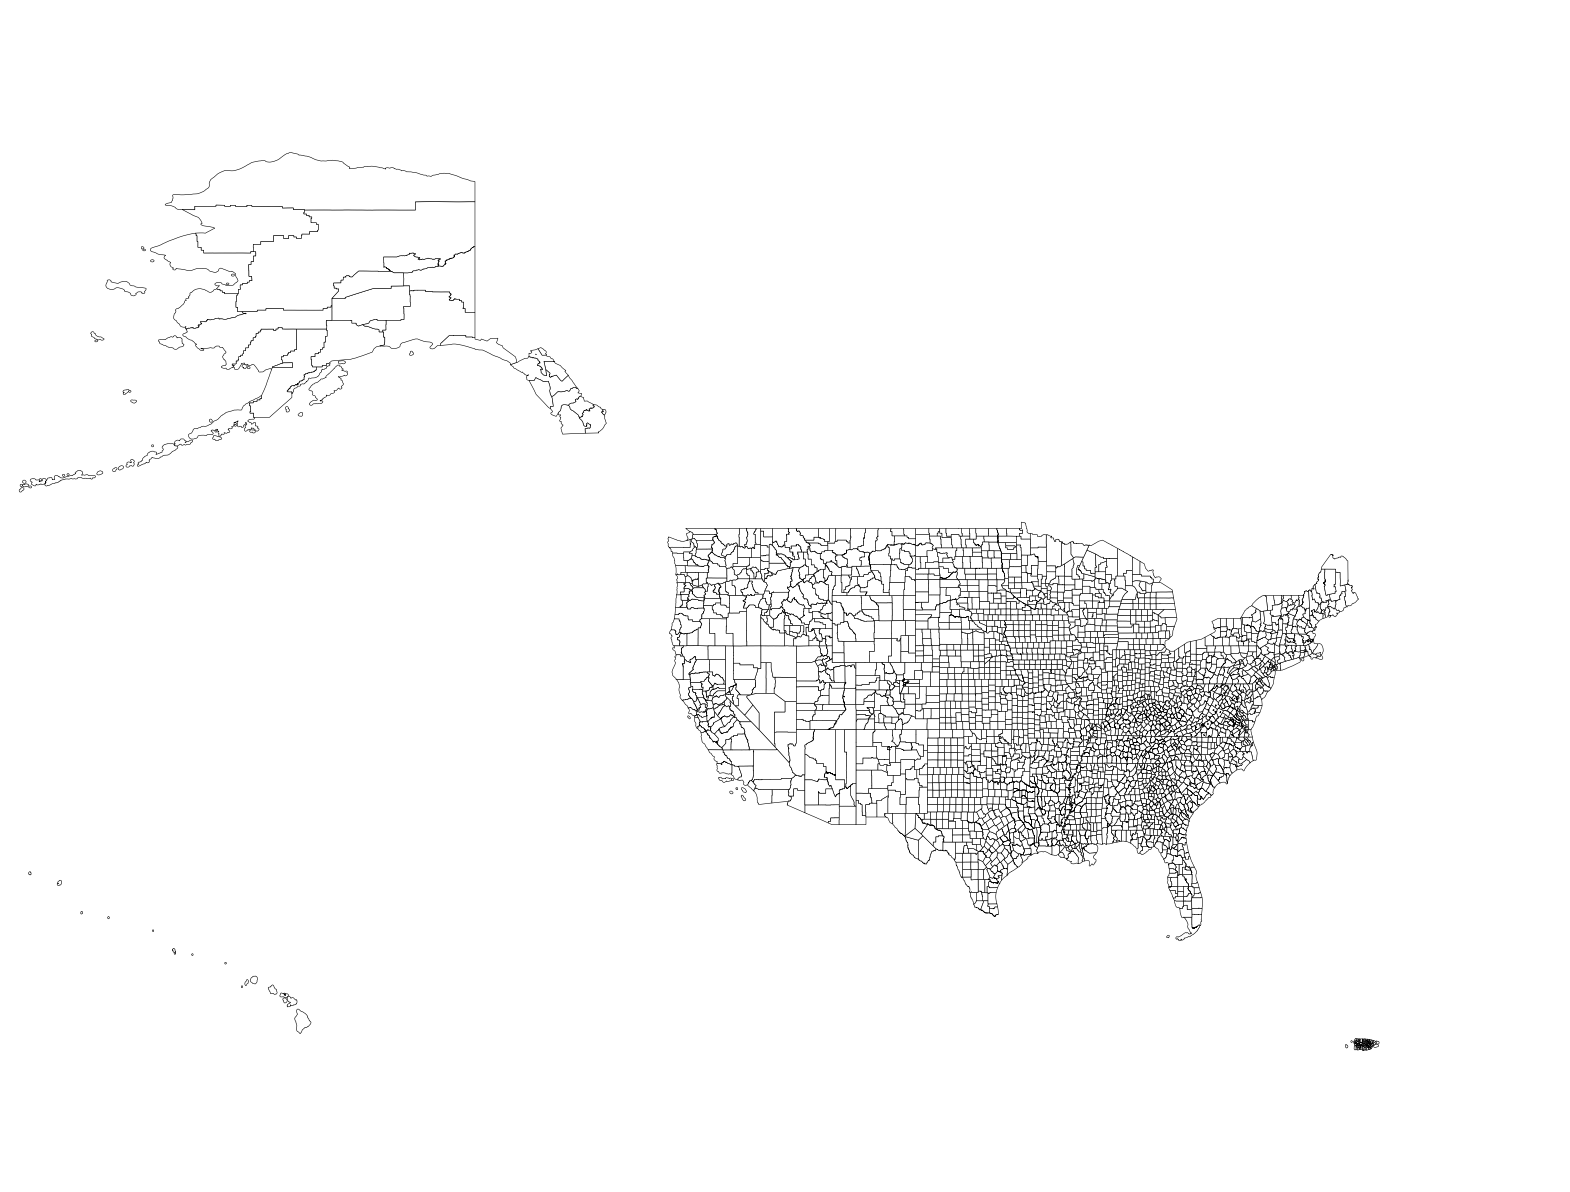

In [59]:
# Load the shapefile of US county map
shapefile_path = "/content/drive/MyDrive/US Elections 2020 county /county.geo.json"
us_map = gpd.read_file(shapefile_path)

fig, ax = plt.subplots(figsize=(20, 20))

us_map.plot(ax=ax, color='white', edgecolor='black', linewidth=0.4)

ax.set_xlim(-180, -50)
ax.set_ylim(10, 80)
ax.axis('off')

plt.show()

<ipython-input-58-a0c0122bac3f>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  us_map['winner_color'].fillna(most_common_winner, inplace=True)  # Fill missing counties


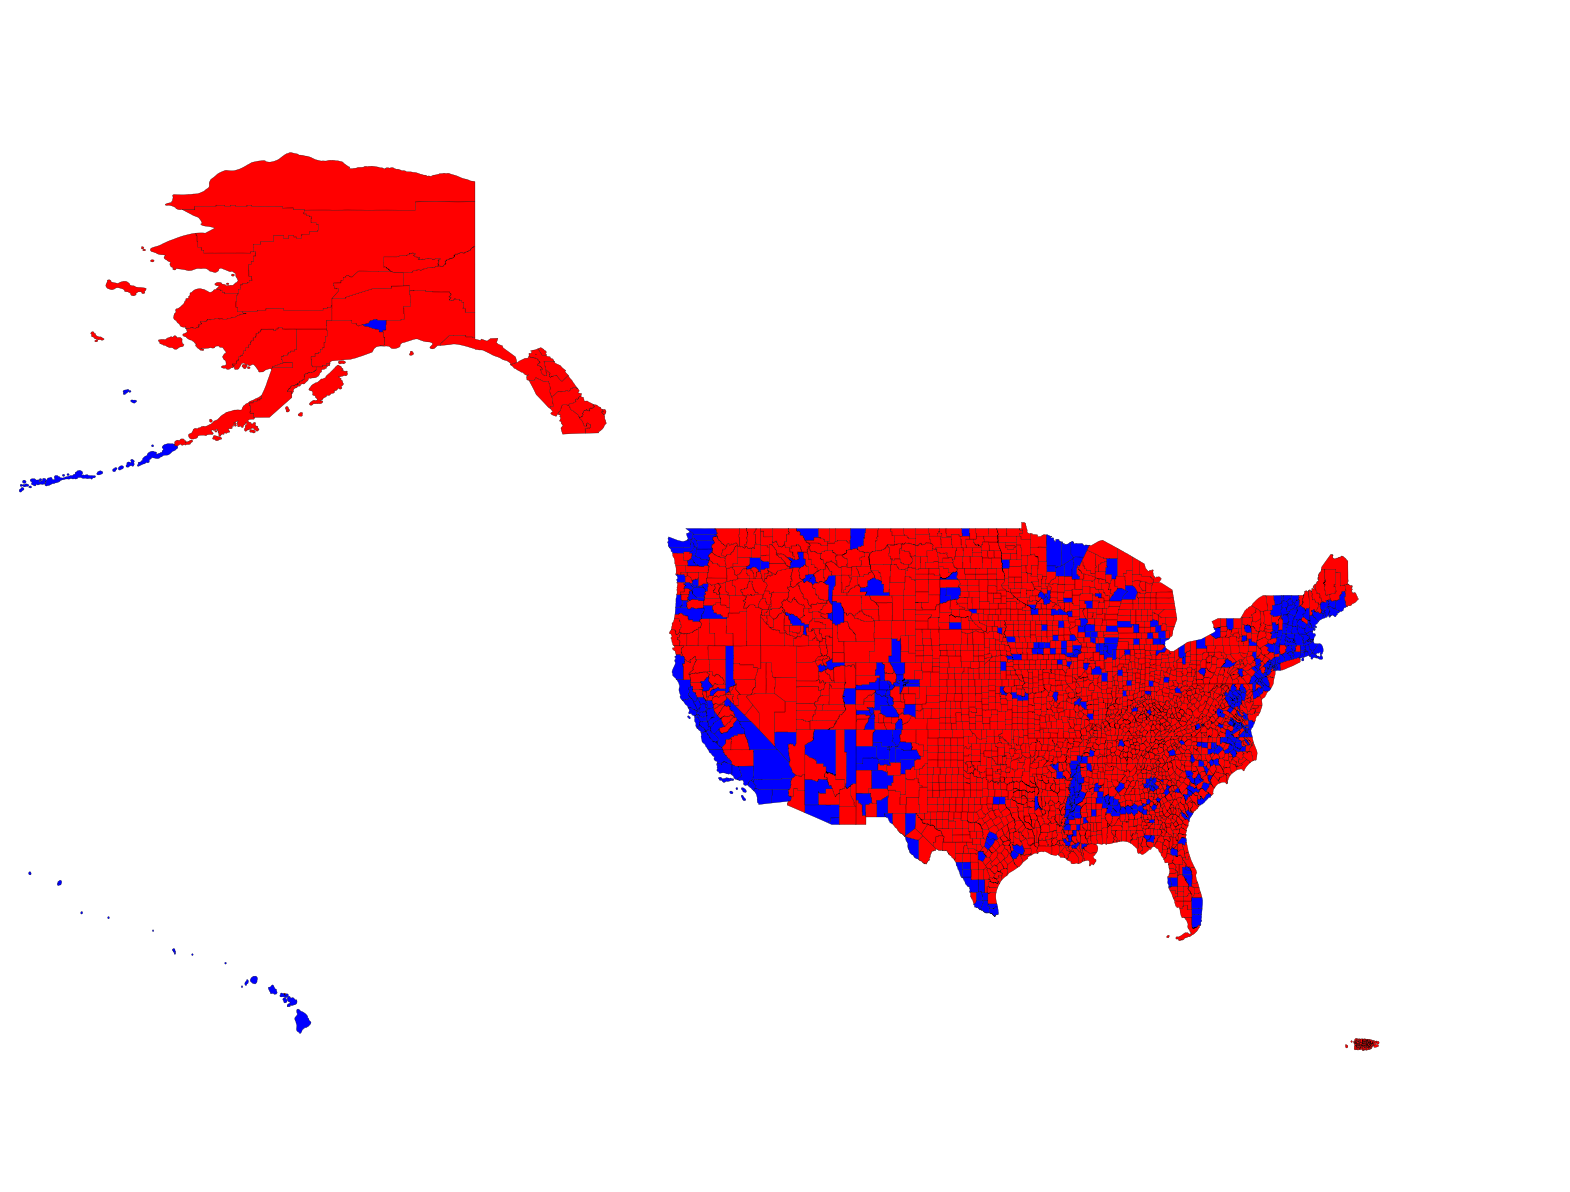

In [58]:
# Load the shapefile
shapefile_path = "/content/drive/MyDrive/US Elections 2020 county /county.geo.json"
us_map = gpd.read_file(shapefile_path)

# Load the dataset
data_path = "/content/drive/MyDrive/US Elections 2020 county /2020_US_County_Level_Presidential_Results_filled.csv"
election_data = pd.read_csv(data_path)

us_map['GEOID10'] = us_map['GEOID10'].astype(int).astype(str).str.zfill(5)

election_data['county_fips'] = election_data['county_fips'].fillna(0).astype(int).astype(str).str.zfill(5)

# Determine the party with the most votes in each county
election_data['winner'] = election_data[['DEMOCRAT', 'REPUBLICAN', 'OTHER']].idxmax(axis=1)
election_data['winner_color'] = election_data['winner'].map({
    'DEMOCRAT': 'blue',
    'REPUBLICAN': 'red',
    'OTHER': 'black'
})

# Merging shapefile data with the election results
us_map = us_map.merge(
    election_data[['county_fips', 'winner_color']],
    left_on='GEOID10',
    right_on='county_fips',
    how='left'
)

# Filling the NaN values in 'winner_color' with the most common winner color instead of gray
most_common_winner = election_data['winner_color'].mode()[0]  # Find most common winner
us_map['winner_color'].fillna(most_common_winner, inplace=True)  # Fill missing counties

fig, ax = plt.subplots(figsize=(20, 20))
us_map.plot(ax=ax, color=us_map['winner_color'], edgecolor='black', linewidth=0.2)

ax.set_xlim(-180, -50)
ax.set_ylim(10, 80)
ax.axis('off')
plt.show()